# Data Exploration & Analysis

## To Do:
1. Create regression model that will predict expected price of a car
2. Create clustered map of "good deals" within different regions

In [11]:
import pandas as pd
import os
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as sm

plt.style.use('ggplot')
%matplotlib inline

# Exploratory Analysis
1. Scroll through the dataframe for any obvious errors
2. Describe command to verify the descriptive statistics
3. Visualize using the scatterplot matrix to explore histograms of each parameter and look for outliers/trends
4. Heat map of the correlation matrix to determine which parameters are strongly correlated to identify potential strong predictors for the multiple linear regression or potential confounders

In [8]:
# Read in scraped car data
data_file = os.path.join(os.getcwd(),"data/archive","all_cars.csv")  # change to updated scraped data file
cars = pd.read_csv(data_file)
# pd.set_option("display.max_rows", None,"display.max_columns",None) 
cars

,post_date,lastpull_ts,link,price,year,make,model,body,mileage,title_type,city,state,seller,trim,ext_color,int_color,transmission,liters,cylinders,fuel_type,n_doors,ext_condition,int_condition,drive_type,VIN,n_pics
0,2020-03-21,1584801100,https://cars.ksl.com/listing/6107041,35000,2015,Tesla,Model S,Sedan,21139,NaN,Salt Lake City,UT,Dealer,kWh Battery,black,tan,Automatic,NaN,NaN,Electric,4.0,NaN,NaN,RWD,5YJSA1E14FF116177,67
1,2020-03-21,1584801100,https://cars.ksl.com/listing/6220811,16999,2014,GMC,1500,Truck,91709,NaN,Woods Cross,UT,Dealer,SLE,summit white,cocoa/dune,Automatic,NaN,8.0,Flex Fuel,4.0,NaN,NaN,4-Wheel Drive,1GTV2UEC5EZ263713,31
2,2020-03-21,1584801101,https://cars.ksl.com/listing/6220809,26978,2016,Infiniti,Q70L,Sedan,7042,NaN,Woods Cross,UT,Dealer,NaN,majestic white,wheat,Automatic,NaN,8.0,Gasoline,4.0,NaN,NaN,AWD,JN1AY1PR5GM590046,31
3,2020-03-21,1584801102,https://cars.ksl.com/listing/6289112,9500,2015,Hyundai,Elantra GT,Compact,79199,Clean Title,Price,UT,Owner,NaN,blue,gray,Automatic,NaN,4.0,Gasoline,4.0,NaN,Very Good,FWD,KMHD35LH9FU242533,13
4,2020-03-21,1584801103,https://cars.ksl.com/listing/5952682,34335,2018,Jeep,Wrangler Unlimited,Convertible,25,NaN,West Valley City,UT,Dealer,Sport S,gobi clearcoat,black,Automatic,NaN,6.0,Gasoline,4.0,NaN,NaN,4-Wheel Drive,1C4HJWDG6JL898663,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2020-03-21,1584801288,https://cars.ksl.com/listing/6254216,25600,2017,Subaru,Outback,Sport Utility,38315,NaN,Salt Lake City,UT,Dealer,Limited,ice silver metallic,slate black,NaN,3.6,6.0,Gasoline,4.0,NaN,NaN,NaN,4S4BSEKC6H3231045,46
178,2020-03-21,1584801289,https://cars.ksl.com/listing/6254215,23500,2017,Subaru,Outback,Sport Utility,42313,NaN,Salt Lake City,UT,Dealer,Limited,tungsten metallic,warm ivory,NaN,3.6,6.0,Gasoline,4.0,NaN,NaN,NaN,4S4BSENC7H3336382,49
179,2020-03-21,1584801290,https://cars.ksl.com/listing/6254214,23000,2017,Subaru,Outback,Sport Utility,44734,NaN,Salt Lake City,UT,Dealer,Limited,crystal black silica,warm ivory,NaN,2.5,4.0,Gasoline,4.0,NaN,NaN,NaN,4S4BSAKC7H3256027,8
180,2020-03-21,1584801290,https://cars.ksl.com/listing/6220719,12695,2015,Mazda,Mazda3,Sedan,59156,NaN,Bountiful,UT,Dealer,i Grand Touring,meteor gray mica,black,Automatic,NaN,4.0,Gasoline,4.0,NaN,NaN,FWD,JM1BM1W71F1227904,29


## Data Exploration
### Descriptive Statistics

In [9]:
display(cars.describe())
display(cars.info())

,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics
count,1.820000e+02,182.000000,182.000000,182.000000,9.000000,179.000000,152.000000,182.000000
mean,1.584801e+09,20810.934066,2014.208791,70603.428571,3.122222,5.770950,3.868421,18.857143
std,5.717718e+01,11116.940361,4.546911,52935.027626,1.014615,1.678698,0.560088,15.619135
min,1.584801e+09,1550.000000,1999.000000,4.000000,2.000000,4.000000,2.000000,0.000000
25%,1.584801e+09,12661.250000,2012.000000,26649.750000,2.500000,4.000000,4.000000,4.000000
50%,1.584801e+09,19112.500000,2015.000000,60254.500000,2.500000,6.000000,4.000000,19.500000
75%,1.584801e+09,28933.750000,2017.750000,100811.750000,3.600000,8.000000,4.000000,30.000000
max,1.584801e+09,60450.000000,2020.000000,255500.000000,5.300000,10.000000,5.000000,85.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 26 columns):
post_date        182 non-null object
lastpull_ts      182 non-null int64
link             182 non-null object
price            182 non-null int64
year             182 non-null int64
make             182 non-null object
model            182 non-null object
body             181 non-null object
mileage          182 non-null int64
title_type       77 non-null object
city             181 non-null object
state            181 non-null object
seller           182 non-null object
trim             160 non-null object
ext_color        178 non-null object
int_color        148 non-null object
transmission     170 non-null object
liters           9 non-null float64
cylinders        179 non-null float64
fuel_type        182 non-null object
n_doors          152 non-null float64
ext_condition    34 non-null object
int_condition    35 non-null object
drive_type       148 non-null object
VIN          

None

### Scatter Matrix & Correlation Matrix

,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics
lastpull_ts,1.000000,-0.028204,-0.102497,0.025450,0.023194,0.016815,-0.116945,-0.032426
price,-0.028204,1.000000,0.533571,-0.560630,0.249006,0.384400,0.150918,0.193725
year,-0.102497,0.533571,1.000000,-0.784137,-0.469750,-0.251917,0.282275,0.078995
mileage,0.025450,-0.560630,-0.784137,1.000000,0.585049,0.273926,-0.212083,-0.086028
liters,0.023194,0.249006,-0.469750,0.585049,1.000000,0.967933,NaN,0.070805
cylinders,0.016815,0.384400,-0.251917,0.273926,0.967933,1.000000,-0.148970,0.044640
n_doors,-0.116945,0.150918,0.282275,-0.212083,NaN,-0.148970,1.000000,0.161874
n_pics,-0.032426,0.193725,0.078995,-0.086028,0.070805,0.044640,0.161874,1.000000


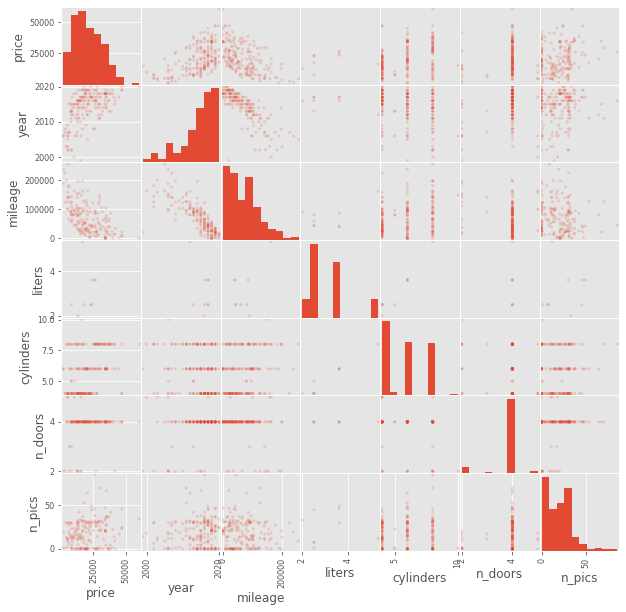

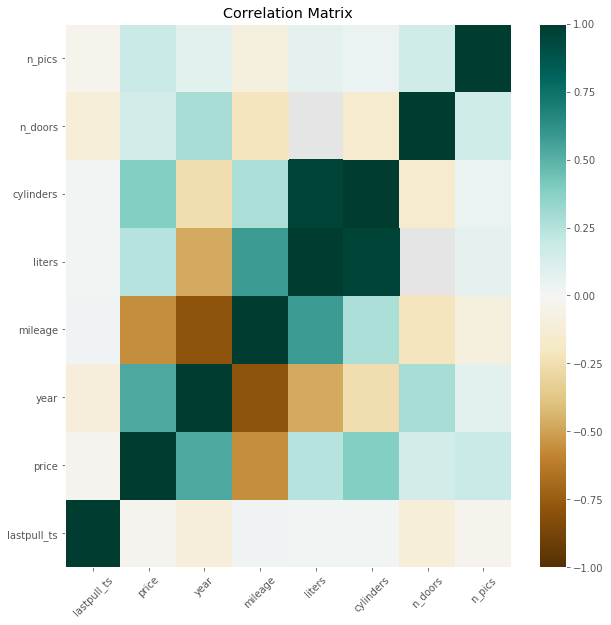

In [10]:
# Check histograms and scatter matrix for outliers
# Scatter Matrix
scatter_matrix(cars[["price", "year", "mileage", "liters", "cylinders", "n_doors", "n_pics"]], alpha = 0.2, \
               figsize=(10, 10))
print()

# Correlation Matrix
fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(111)
plt.pcolor(cars.corr(),vmin=-1,vmax=1, cmap=plt.cm.get_cmap('BrBG'))
labels = ['lastpull_ts','price','year','mileage','liters','cylinders','n_doors','n_pics'] # check labels for final df
plt.xticks([i+0.5 for i in range(len(labels))],labels=labels,rotation=45)
plt.yticks([i+0.5 for i in range(len(labels))],labels=labels)
plt.title("Correlation Matrix");
plt.colorbar();
display(cars.corr())

# Analysis
## Regression
Aim: predict the price of a newly-listed used car
Dependent variable:list price 
Possible independent variables:year, seller type (dealer, private),mileage, color, title (clean/salvaged), transmission type, cylinders, fuel type, number of doors, exterior/interior condition, listing date, page views per day (when a listing has reached 7 days). 
We will use the Python package statsmodels to perform all regression analyses. 
1. Multiple linear regression first using the parameters that had strong correlations with list price. 
2. Based off of this initial model we will adjust our multiple linear regression to only include parameters that have significant p-values for their individual coefficients. 
Significance level: 𝝰=0.05

Expected Outcomes:
* Our final model should have a p-value < 0.05 for the F-statistic of the overall model. 
* We are aiming to explain at least 70% of the variance with our model and hope to get anR-squared value of 0.70 or more.

## Clustering
Aim: Cluster what we classify as a “good deal” in its respective geographical location and create clusters
showing areas in Utah where cars are generally sold for a good deal. 

## Regression

In [ ]:
# multiple linear regression
df_all_ols = sm.ols(formula="SoldPrice ~ Acres + Deck + Latitude + Longitude + Patio + PkgSpacs + Taxes + TotBed + TotBth + TotSqf + YearBlt + GaragCap", data=df).fit()
display(df_all_ols.summary())

# remove unsignificant variables
# df_all_ols = sm.ols(formula="SoldPrice ~ Longitude + Taxes + TotSqf + GaragCap", data=df).fit()
# display(df_all_ols.summary())